In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary dataset.csv to Salary dataset.csv


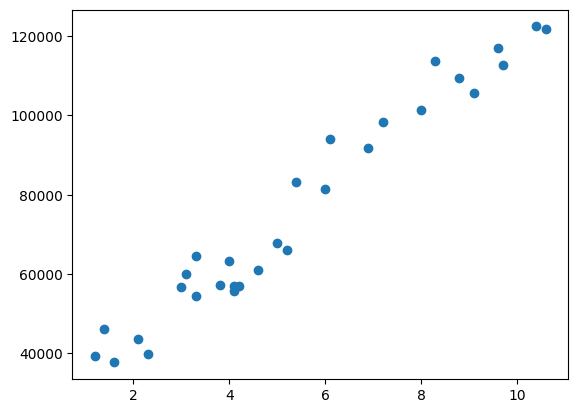

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# read data from CSV file with numpy
data = np.genfromtxt('Salary dataset.csv', delimiter=',', skip_header=1)

# separate features (YearsExperience) from target variable (Salary)
n = data.shape[0]
X = data[:, 1].reshape(n, 1)
y = data[:, -1]

# display data with matplotlib
plt.scatter(X, y)
plt.show()

In [19]:
# for comparison
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("=== Trained linear regression model with sklearn library ===")
print("Intercept =", lin_reg.intercept_, "\nCoefficient =", lin_reg.coef_[0])

=== Trained linear regression model with sklearn library ===
Intercept = 24848.203966523193 
Coefficient = 9449.962321455077


In [20]:
# implement gradient descent algorithm for linear regression
# gradient descent:
# iteratively adjust the parameters (theta) to find min of cost function
# alpha: size of the steps to take towards the minimum
def fit(X, y, alpha, num_iters):
  # number of training examples
  m = X.shape[0]

  # initialize theta with 2 elements: intercept and slope
  theta = np.zeros(2)

  for _ in range(num_iters):
    # perform matrix multiplication of X (shape (30, 2)) and theta (shape (2,))
    # to get predictions of shape (30,)
    predictions = X.dot(theta)

    error = predictions - y

    # get sum of the gradients for all training examples
    # aggregate the errors across all training examples
    # transpose X: m x n matrix -> n x m matrix
    # error: m x 1 vector
    # X.T.dot(error) -> n x 1 vector whose element each represents sum of
    # partial derivative of cost funtion w.r.t. each parameter in theta
    sum_gradients = X.T.dot(error)

    # get average gradient
    average_gradient = (1 / m) * X.T.dot(error)

    # adjust model parameters in the opposite direction of the gradient
    # gradient vector points in the direction where cost function
    # increases the most rapidly
    theta = theta - alpha * average_gradient

  return theta

In [21]:
def predict(X, theta):
  y_pred_list = []
  for x in X:
    y_pred = theta[1] * x + theta[0]
    y_pred_list.append(y_pred)
  reg = np.array(y_pred_list)
  return reg

In [22]:
def visualize(X, y, alpha, num_iters):
  # plot given data set
  plt.scatter(X, y)

  # get theta according to learning rate (alpha) and number of iterations
  X = np.c_[np.ones(X.shape[0]), X]
  theta = fit(X, y, alpha, num_iters)

  # plot linear regression line
  x_line = np.linspace(0, 12)
  reg = predict(x_line, theta)
  plt.plot(x_line, reg)

  plt.xlim(0, 12)
  plt.ylim(-5000, 140000)
  plt.text(0.2, 134000, f"Num Iterations: {num_iters}", fontsize=8, color='black')
  plt.text(0.2, 129000, f"Intercept: {theta[0]:.2f}", fontsize=8, color='black')
  plt.text(0.2, 124000, f"Coefficient: {theta[1]:.2f}", fontsize=8, color='black')
  plt.show()


=== Own implementation ===


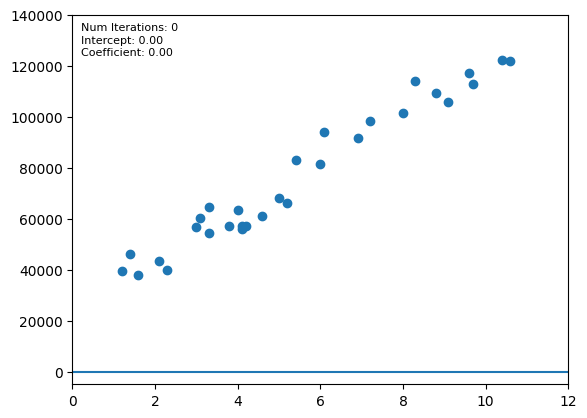

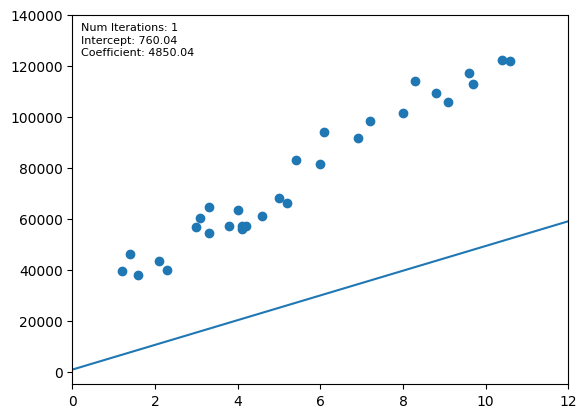

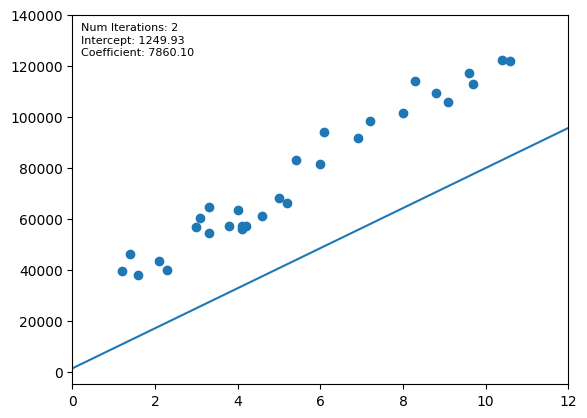

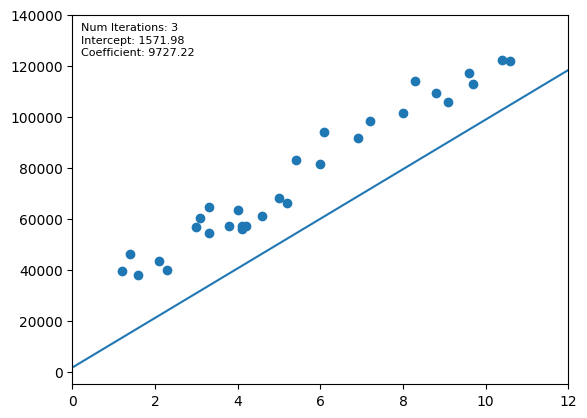

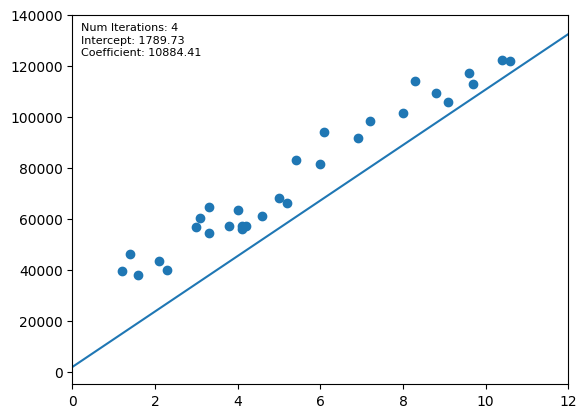

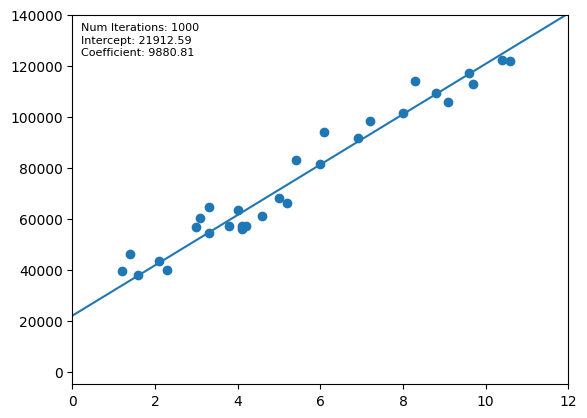

In [23]:
print("\n=== Own implementation ===")
alpha = 0.01
visualize(X, y, alpha, 0)
visualize(X, y, alpha, 1)
visualize(X, y, alpha, 2)
visualize(X, y, alpha, 3)
visualize(X, y, alpha, 4)
visualize(X, y, alpha, 1000)

In [24]:
def get_cost(X, y, theta):
    # calculate diff between model predictions and actual target values
    error = X.dot(theta) - y

    # calculate squared sum of the loss and scale it by 1/(2 * num of examples)
    cost = np.sum(error ** 2) / (2 * len(X))

    # return the computed cost as a measure of model fit
    return cost

In [25]:
X = np.hstack((np.ones((n, 1)), X))

In [26]:
# test get_cost() with theta = [0,0]
cost_for_theta_zero = get_cost(X, y, [0, 0])
print(cost_for_theta_zero) # expected result: approx. 3251553638

3251553638.866667


In [27]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # number of training examples
    J_history = []  # list to store cost values at each iteration

    for itr in range(num_iters):
        error = X.dot(theta) - y
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - alpha * gradient

        # add cost for the current theta values to the history list
        cost = get_cost(X, y, theta)
        J_history.append(cost)

    return (theta, J_history)

In [28]:
# initialize theta with 2 elements: intercept and slope
theta = np.zeros(2)

# train the model with fit_with_cost()
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

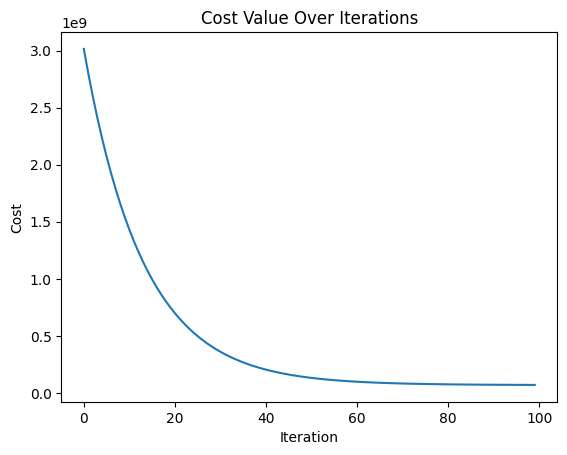

In [29]:
# visualize cost value over iterations
plt.plot(J_history)
plt.title("Cost Value Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [30]:
def display_salary(years_experience):
  # predicted_salary = theta[0] + theta[1] * years_experience
  predicted_salary = predict([years_experience], theta)[0]
  print(f"Predicted salary for {years_experience} years of experience {predicted_salary}")

display_salary(10)
display_salary(15)

Predicted salary for 10 years of experience 127134.91360616997
Predicted salary for 15 years of experience 189547.72611796323
